# Test water viscosity function #

Test the viscosity function of the water properties userobject.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The viscosity of water defined in *Release on the IAPWS Formulation 2008 for the Viscosity of Ordinary Water Substance*. Note that the enhancement near the critical point has not been included.

In [77]:
def viscosity(t, rho) :
    
    t_c2k = 273.15
    d_critical=322.0
    t_critical=647.096
    mu_star=1.0e-6
    
    
    ivs = [0,1,2,3,0,1,2,3,5,0,1,2,3,4,0,1,0,3,4,3,5]
    jvs = [0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,4,4,5,6,6]
    h0v = [1.67752, 2.20462, 0.6366564, -0.241605]
    h1v = [5.20094e-1, 8.50895e-2, -1.08374, -2.89555e-1, 2.22531e-1, 9.99115e-1,
           1.88797, 1.26613, 1.20573e-1, -2.81378e-1, -9.06851e-1, -7.72479e-1,
           -4.89837e-1, -2.57040e-1, 1.61913e-1, 2.57399e-1, -3.25372e-2, 6.98452e-2,
           8.72102e-3, -4.35673e-3, -5.93264e-4]
    tauipow = np.zeros(4)
    tspow = np.zeros(6)
    dspow = np.zeros(7)

    tk = t + t_c2k
    tau = tk / t_critical
    delr = rho / d_critical

    tauipow[0]=1.
    tauipow[1]=1. / tau
    tauipow[2]=tauipow[1]*tauipow[1]
    tauipow[3]=tauipow[2]*tauipow[1]

    tspow[0]=1.
    tspow[1]=tauipow[1]-1.
    tspow[2]=tspow[1]*tspow[1]
    tspow[3]=tspow[2]*tspow[1]
    tspow[4]=tspow[3]*tspow[1]
    tspow[5]=tspow[4]*tspow[1]

    dspow[0]=1.
    dspow[1]=delr-1.
    dspow[2]=dspow[1]*dspow[1]
    dspow[3]=dspow[2]*dspow[1]
    dspow[4]=dspow[3]*dspow[1]
    dspow[5]=dspow[4]*dspow[1]
    dspow[6]=dspow[5]*dspow[1]

    s0=0.
    for i in xrange(0,4) :
        s0=s0 + h0v[i] * tauipow[i]
    mu0=100. * np.sqrt(tau) / s0
    
    s1=0.
    for i in xrange(0,21) :
        s1 = s1 + tspow[ivs[i]] * h1v[i] * dspow[jvs[i]]

    mu1 = np.exp(delr * s1)
    
    return mu_star * mu0 * mu1

In [78]:
print viscosity(25, 998)*1e6

889.73510015


Comparing the results with the tabulated verification points provided in Table 4 of *Release on the IAPWS Formulation 2008 for the Viscosity of Ordinary Water Substance*.

In [38]:
print viscosity(298.15-273.15, 998)*1e6
print viscosity(298.15-273.15, 1200)*1e6
print viscosity(373.15-273.15, 1000)*1e6
print viscosity(433.15-273.15, 1)*1e6
print viscosity(433.15-273.15, 1000)*1e6
print viscosity(873.15-273.15, 1)*1e6
print viscosity(873.15-273.15, 100)*1e6
print viscosity(873.15-273.15, 600)*1e6
print viscosity(1173.15-273.15, 1)*1e6
print viscosity(1173.15-273.15, 100)*1e6
print viscosity(1173.15-273.15, 400)*1e6

889.73510015
1437.64946669
307.883622342
14.5383244858
217.685358265
32.619286974
35.8022617219
77.4301952273
44.2172445147
47.6404330811
64.1546078484


Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/). The viscosity data is in column 11.

In [19]:
nist_data = pd.read_csv('gold/water_properties_nist_t50.txt', delimiter='\t', header=None)

Read in the MOOSE data.

In [79]:
moose_data = pd.read_csv('gold/WaterProperty_viscosity_vpp_0001.csv')

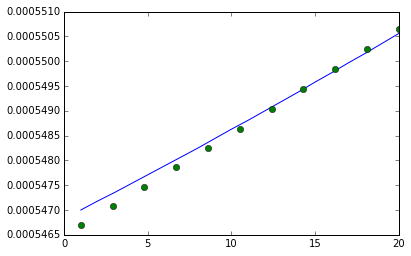

In [80]:
plt.plot(nist_data.icol(1),nist_data.icol(11)/1.e6)
plt.plot((1+9.5 * moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')